In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import plotly.express as px
import os
import glob

# SUBSCRIPTIONS

In [10]:
DATA_PATH = '../data'
FAKE_FILENAME = 'subscriptions.csv'
sub_df = pd.read_csv(os.path.join(DATA_PATH, FAKE_FILENAME))

In [12]:
sub_df.head()

,subscription_date,user_id,renew,first_subscription_date,first_subscription,referral,promotion,payment3x,payment2,payment3,diff_year
0,2019-01-03,1451451,0,2012-02-05,0,0,0,0,0,0,7
1,2019-01-04,2799991,1,2018-01-03,0,0,0,0,0,0,1
2,2019-01-04,2802071,1,2018-01-03,0,0,0,0,0,0,1
3,2019-01-05,648449,1,2019-01-05,1,1,0,0,0,0,0
4,2019-01-05,1451569,1,2012-02-05,0,0,0,0,0,0,7


In [113]:
sub_df["subscription_date"] = pd.to_datetime(sub_df["subscription_date"])
sub_df["first_subscription_date"] = pd.to_datetime(sub_df["first_subscription_date"])

In [115]:
sub_grouped = sub_df.groupby("user_id").agg({'subscription_date': ['min','max',"count"],
                                                   "renew":"last", "first_subscription_date":"first",
                                                   "first_subscription":"last","referral":"first",
                                                   "promotion":"first","payment3x":"first",
                                                   "payment2":"last","payment3":"last"})

In [117]:
sub_grouped.head()

subscription_date                  renew first_subscription_date  \
                      min        max count  last                   first   
user_id                                                                    
1              2019-10-02 2019-10-02     1     0              2010-11-08   
9              2019-11-20 2020-11-20     2     1              2018-11-20   
10             2019-03-30 2019-03-30     1     1              2019-03-30   
40             2021-10-03 2021-10-03     1     1              2018-10-03   
67             2019-11-18 2019-11-18     1     1              2019-11-18   

        first_subscription referral promotion payment3x payment2 payment3  
                      last    first     first     first     last     last  
user_id                                                                    
1                        0        0         0         0        0        0  
9                        0        0         0         0        0        0  
10                       1        0         0         0        0        0  
40                       0        0         0         0        0        0  
67                       1        0         0         0        0        0

## DISTRIBUTION

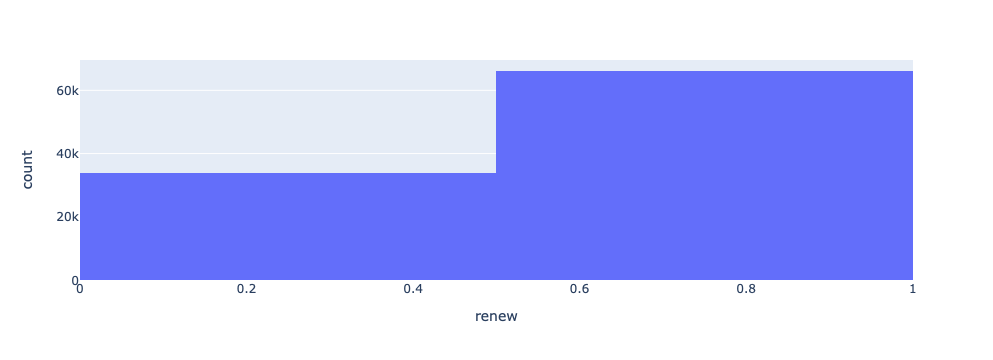

In [109]:
hist1 = px.histogram(sub_df, x = "renew", range_x=(0,1))
hist1.show()

# EXCHANGES

In [57]:
DATA_PATH = '../data'
FAKE_FILENAME = 'Exchanges_clean.csv.gz'
exchanges_clean_df = pd.read_csv(os.path.join(DATA_PATH, FAKE_FILENAME),compression="gzip")

In [58]:
exchanges_clean_df.head()

,Unnamed: 0,conversation_id,exchange_id,created_at,creator_id,guest_user_id,host_user_id,finalized_at,canceled_at,start_on,...,night_count,exchange_type,home_type,residence_type,capacity,country,region,department,city,diff_capacity
0,0,41311972,63399698,2021-08-22,389898,389898,3277768,NaN,NaN,NaN,...,0,NON_RECIPROCAL,Home,primary,2.0,NLD,Groningue,Het Hogeland,Onderdendam,2.0
1,1,43121577,65438439,2022-02-06,2191577,2191577,3609949,NaN,NaN,NaN,...,0,NON_RECIPROCAL,apartment,secondary,6.0,ESP,Les Asturies,Les Asturies,Avilés,3.0
2,2,38156044,59856100,2020-07-17,2207335,2207335,3537414,NaN,NaN,2020-07-27,...,6,NON_RECIPROCAL,apartment,secondary,4.0,ESP,Les Asturies,Les Asturies,Cangas de Onís,0.0
3,3,34141158,55536249,2019-08-02,450515,450515,2822792,NaN,NaN,NaN,...,0,NON_RECIPROCAL,Home,primary,6.0,FRA,Centre-Val De Loire,Loir-Et-Cher,Blois,6.0
4,4,38553219,60287269,2020-09-14,3055374,3055374,3243667,2020-09-15 12:12:35 UTC,NaN,2020-09-18,...,2,NON_RECIPROCAL,Home,primary,6.0,FRA,Centre-Val De Loire,Loir-Et-Cher,Mont-Prés-Chambord,1.0


In [59]:
exchanges_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11969751 entries, 0 to 11969750
Data columns (total 22 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   conversation_id         int64  
 2   exchange_id             int64  
 3   created_at              object 
 4   creator_id              int64  
 5   guest_user_id           int64  
 6   host_user_id            int64  
 7   finalized_at            object 
 8   canceled_at             object 
 9   start_on                object 
 10  end_on                  object 
 11  guest_countguest_count  int64  
 12  night_count             int64  
 13  exchange_type           object 
 14  home_type               object 
 15  residence_type          object 
 16  capacity                float64
 17  country                 object 
 18  region                  object 
 19  department              object 
 20  city                    object 
 21  diff_capacity           float

In [60]:
exchanges_clean_df = exchanges_clean_df.drop(columns = ["Unnamed: 0"])

In [61]:
exchanges_clean_df["created_at"] = pd.to_datetime(exchanges_clean_df["created_at"])
exchanges_clean_df["finalized_at"] = pd.to_datetime(exchanges_clean_df["finalized_at"])
exchanges_clean_df["canceled_at"] = pd.to_datetime(exchanges_clean_df["canceled_at"])
exchanges_clean_df["start_on"] = pd.to_datetime(exchanges_clean_df["start_on"],errors = 'coerce')
exchanges_clean_df["end_on"] = pd.to_datetime(exchanges_clean_df["end_on"],errors = 'coerce')

In [62]:
exchanges_clean_df["exchange_type"] = exchanges_clean_df["exchange_type"].astype("string")
exchanges_clean_df["home_type"] = exchanges_clean_df["home_type"].astype("string")
exchanges_clean_df["residence_type"] = exchanges_clean_df["residence_type"].astype("string")
exchanges_clean_df["country"] = exchanges_clean_df["country"].astype("string")
exchanges_clean_df["region"] = exchanges_clean_df["region"].astype("string")
exchanges_clean_df["department"] = exchanges_clean_df["department"].astype("string")
exchanges_clean_df["city"] = exchanges_clean_df["city"].astype("string")

In [63]:
exchanges_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11969751 entries, 0 to 11969750
Data columns (total 21 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   conversation_id         int64              
 1   exchange_id             int64              
 2   created_at              datetime64[ns]     
 3   creator_id              int64              
 4   guest_user_id           int64              
 5   host_user_id            int64              
 6   finalized_at            datetime64[ns, UTC]
 7   canceled_at             datetime64[ns, UTC]
 8   start_on                datetime64[ns]     
 9   end_on                  datetime64[ns]     
 10  guest_countguest_count  int64              
 11  night_count             int64              
 12  exchange_type           string             
 13  home_type               string             
 14  residence_type          string             
 15  capacity                float64            
 16

In [64]:
exchanges_clean_df['is_finalized'] = exchanges_clean_df["finalized_at"].notna()
exchanges_clean_df['is_cancelled'] = exchanges_clean_df["canceled_at"].notna()

In [45]:
exchanges_clean_df.head()

,conversation_id,exchange_id,created_at,creator_id,guest_user_id,host_user_id,finalized_at,canceled_at,start_on,end_on,...,home_type,residence_type,capacity,country,region,department,city,diff_capacity,is_finalized,is_cancelled
0,41311972,63399698,2021-08-22,389898,389898,3277768,NaT,NaT,NaT,NaT,...,Home,primary,2.0,NLD,Groningue,Het Hogeland,Onderdendam,2.0,False,False
1,43121577,65438439,2022-02-06,2191577,2191577,3609949,NaT,NaT,NaT,NaT,...,apartment,secondary,6.0,ESP,Les Asturies,Les Asturies,Avilés,3.0,False,False
2,38156044,59856100,2020-07-17,2207335,2207335,3537414,NaT,NaT,2020-07-27,2020-08-02,...,apartment,secondary,4.0,ESP,Les Asturies,Les Asturies,Cangas de Onís,0.0,False,False
3,34141158,55536249,2019-08-02,450515,450515,2822792,NaT,NaT,NaT,NaT,...,Home,primary,6.0,FRA,Centre-Val De Loire,Loir-Et-Cher,Blois,6.0,False,False
4,38553219,60287269,2020-09-14,3055374,3055374,3243667,2020-09-15 12:12:35+00:00,NaT,2020-09-18,2020-09-20,...,Home,primary,6.0,FRA,Centre-Val De Loire,Loir-Et-Cher,Mont-Prés-Chambord,1.0,True,False


In [65]:
exchanges_clean_df = exchanges_clean_df.drop(columns=["finalized_at", "canceled_at"], axis=1)

In [75]:
exchanges_clean_df = exchanges_clean_df.drop(exchanges_clean_df[exchanges_clean_df["night_count"]==0].index)

In [77]:
exchanges_clean_df[exchanges_clean_df["night_count"]==0]

,conversation_id,exchange_id,created_at,creator_id,guest_user_id,host_user_id,start_on,end_on,guest_countguest_count,night_count,...,home_type,residence_type,capacity,country,region,department,city,diff_capacity,is_finalized,is_cancelled


In [81]:
exchanges_clean_df = exchanges_clean_df.drop(exchanges_clean_df[exchanges_clean_df["start_on"].isnull()].index)

In [83]:
exchanges_clean_df = exchanges_clean_df.drop(columns=["region", "department", "city"])

In [85]:
exchanges_clean_df["home_type"] = exchanges_clean_df["home_type"].fillna(exchanges_clean_df["home_type"].mode().iloc[0])
exchanges_clean_df["residence_type"] = exchanges_clean_df["residence_type"].fillna(exchanges_clean_df["residence_type"].mode().iloc[0])

In [87]:
exchanges_clean_df["country"] = exchanges_clean_df["country"].fillna(exchanges_clean_df["country"].mode().iloc[0])

In [91]:
exchanges_clean_df["capacity"] = exchanges_clean_df["capacity"].fillna(exchanges_clean_df["capacity"].mean())

In [99]:
values = {"diff_capacity":exchanges_clean_df["capacity"] - exchanges_clean_df["guest_countguest_count"]}
exchanges_clean_df = exchanges_clean_df.fillna(values)
exchanges_clean_df["diff_capacity"]= exchanges_clean_df["diff_capacity"].astype(int)
exchanges_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10622171 entries, 2 to 11969750
Data columns (total 18 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   conversation_id         int64         
 1   exchange_id             int64         
 2   created_at              datetime64[ns]
 3   creator_id              int64         
 4   guest_user_id           int64         
 5   host_user_id            int64         
 6   start_on                datetime64[ns]
 7   end_on                  datetime64[ns]
 8   guest_countguest_count  int64         
 9   night_count             int64         
 10  exchange_type           string        
 11  home_type               string        
 12  residence_type          string        
 13  capacity                float64       
 14  country                 string        
 15  diff_capacity           int64         
 16  is_finalized            bool          
 17  is_cancelled            bool          
dtypes: bo

In [111]:
exchanges_clean_df.isnull().sum()

conversation_id           0
exchange_id               0
created_at                0
creator_id                0
guest_user_id             0
host_user_id              0
start_on                  0
end_on                    0
guest_countguest_count    0
night_count               0
exchange_type             0
home_type                 0
residence_type            0
capacity                  0
country                   0
diff_capacity             0
is_finalized              0
is_cancelled              0
dtype: int64

In [119]:
exchanges_clean_df.head()

,conversation_id,exchange_id,created_at,creator_id,guest_user_id,host_user_id,start_on,end_on,guest_countguest_count,night_count,exchange_type,home_type,residence_type,capacity,country,diff_capacity,is_finalized,is_cancelled
2,38156044,59856100,2020-07-17,2207335,2207335,3537414,2020-07-27,2020-08-02,4,6,NON_RECIPROCAL,apartment,secondary,4.0,ESP,0,False,False
4,38553219,60287269,2020-09-14,3055374,3055374,3243667,2020-09-18,2020-09-20,5,2,NON_RECIPROCAL,Home,primary,6.0,FRA,1,True,False
6,45977191,68682752,2022-07-03,3024428,3024428,605487,2022-08-22,2022-09-02,0,11,NON_RECIPROCAL,apartment,primary,8.0,HRV,8,False,False
7,39073751,60862385,2021-01-07,1483937,1483937,471734,2021-02-13,2021-02-27,0,14,NON_RECIPROCAL,Home,primary,8.0,PYF,8,False,False
8,39256601,61069855,2021-02-11,2772688,2772688,2685956,2021-02-28,2021-03-08,4,8,NON_RECIPROCAL,Home,primary,7.0,USA,3,False,False
